In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
label=df.groupby('label')
label

In [4]:
label.get_group('rice')

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [5]:
label[["humidity"]].mean()



,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [6]:
labels=list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [7]:
# df['label'].nunique()           # this nunique function gives the number of unique labels in the label column
# df['label'].value_counts()      # this value_counts function gives the number of occurences of each label in the label column
# df['label'].unique()          # this unique function gives the unique labels in the label column


In [8]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

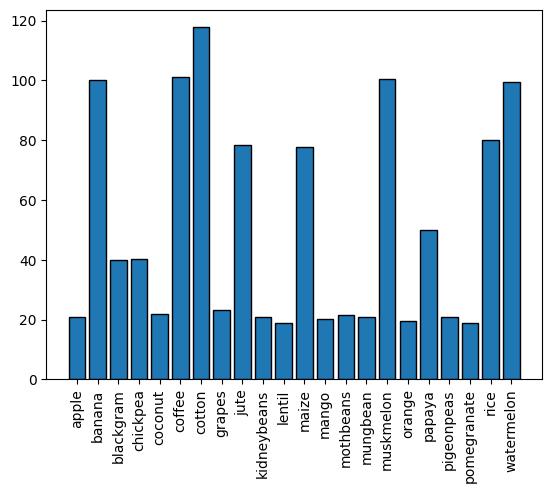

In [9]:
plt.bar(x=labels, height=nitrogen,ec="k")   # ec--> edge color, it is used to set the color of the edges of the bars
plt.xticks(rotation=90)  # it is used to rotate the x-axis labels by 90 degrees for better visibility
plt.show()

In [10]:
x = df.drop(['label'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape

(2200, 7)

In [12]:
desc = pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
desc_formatted = desc.applymap(lambda x: f"{int(x):d}")
desc_formatted.head()

C:\Users\language lab\AppData\Local\Temp\ipykernel_3388\1541474218.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x: f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [16]:
label = kmeans.labels_

In [17]:
df["cluster_8"] = label

In [18]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,7
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,7
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,7
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,7
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,7
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,7
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [19]:
df["cluster_8"].value_counts()

cluster_8
0    555
7    378
1    373
5    215
3    203
4    200
2    167
6    109
Name: count, dtype: int64

In [20]:
df[df["label"] == "rice"]["cluster_8"].value_counts()

cluster_8
7    100
Name: count, dtype: int64

In [21]:
df[df["cluster_8"] == 5]["label"].value_counts()

label
mango         96
pigeonpeas    62
mothbeans     43
blackgram      6
papaya         6
lentil         2
Name: count, dtype: int64

In [22]:

from sklearn.metrics import silhouette_score

silhouette_score(x_transformed, label)

0.29098829088624

In [23]:
kmeans.inertia_

5257.31119881031

In [24]:
WCSS = {}
for i in range(5,31):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_transformed)
    WCSS[i] = kmeans.inertia_


In [25]:
WCSS


{5: 6913.400615142736,
 6: 6078.406581658299,
 7: 5315.513387800587,
 8: 5005.39146078016,
 9: 4646.984983668829,
 10: 4211.171735874797,
 11: 4014.3342157163906,
 12: 3785.539414038757,
 13: 3399.1349282771685,
 14: 3461.08075307338,
 15: 3286.5511621354117,
 16: 2908.6774687748084,
 17: 2720.5929761847624,
 18: 2636.9750974225326,
 19: 2634.761086706577,
 20: 2415.598698979598,
 21: 2360.026848516859,
 22: 2255.0777313175317,
 23: 2264.345830198805,
 24: 2112.2660787200175,
 25: 2016.5378410624335,
 26: 2075.1547731108703,
 27: 2020.0387753798934,
 28: 1855.5249451032987,
 29: 1810.8751803221523,
 30: 1744.049247609275}

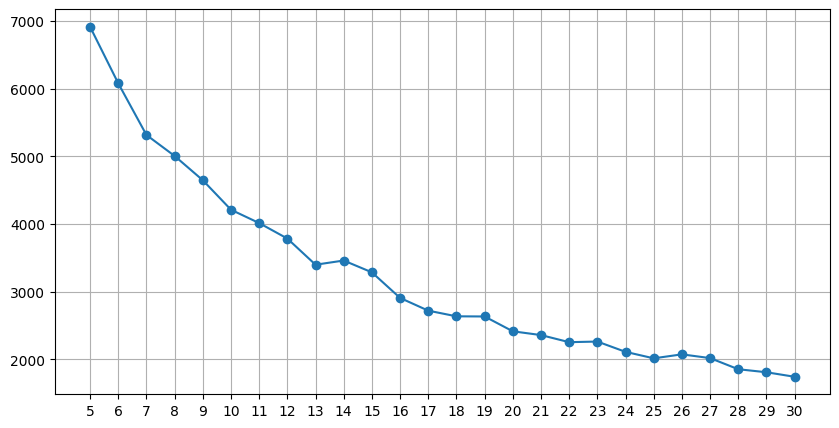

In [26]:
plt.figure(figsize=(10,5))
plt.plot(WCSS.keys(),WCSS.values(), marker = "o")
plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()

In [27]:
import joblib
joblib.dump(kmeans, "Crop_recommendation.lb")

['Crop_recommendation.lb']

In [28]:
joblib.dump(sc,"scaler.lb")

['scaler.lb']

In [29]:
joblib.dump(df,"crop_reco_df.lb")

['crop_reco_df.lb']